# Unsupervised learning

Unsupervised learning is where we have no output, so we only have input and it's up to the algorithmn to tell us something interesting about the data. It's usually used in the data exploration stage. In supervised we can check if we predicted the data correctly, but in unsupervised learning this is not possible as we don't know the answer.

There are three types of Unsupervised learning:
- Clustering: finds subgroups in data
- Dimensionality Reduction: reduce dimensionality in data
- Association rules: uncovers rules within the data e.g. if X then Y


## The machine learning workflow:
1. Data collection
2. Data preparation
3. Train the model
4. Evaluate the model
5. Deploy machine's model

## Easy Unsupervised ML project: Bank marketing
"The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)."



## 1. Data collection

The project sources data from: https://archive.ics.uci.edu/dataset/222/bank+marketing.

I've followed along this kaggle post for reference: https://www.kaggle.com/code/berkayalan/unsupervised-learning-clustering-complete-guide/notebook#Clustering

In [1]:
import pandas as pd

df_bank = pd.read_csv('bank+marketing/bank-additional/bank-additional-full.csv', sep=';')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Data preparation

In [2]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


We can use the one-hot encoding method to convert categorical variables into numeric data. This will create a new column for each category of each feature.


In [3]:
df_bank_dummy = pd.get_dummies(df_bank)
df_bank_dummy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


As we are dealing with distance metric, we will apply scaling. We scale the features to prevent certain features from dominating the distance calculation due to their larger numeric ranges. The standardization process ensures that all features have a mean of 0 and a standard deviation of 1. Ensures all features contribute equally to the distance calculation, regardless of their original scales or units

In [4]:
from sklearn.preprocessing import StandardScaler

# # Scaling the data
scaler = StandardScaler()
df_bank_scaled = scaler.fit_transform(df_bank_dummy)
df_bank_scaled[0]

array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
       -0.58202282, -0.53831699, -0.19143021,  6.15277204, -0.2764353 ,
       -0.2087573 , -0.18903213, -0.3265564 , -0.1473267 , -0.44244927,
       -0.15887166, -0.08987076, -0.35509663,  0.80763764, -0.62493754,
       -0.04411455,  2.97708361, -0.24274754, -0.41474269, -0.54809999,
       -0.0209096 , -0.38191849, -0.64753149, -0.20945296,  0.51371278,
       -0.51359953, -0.00853476,  1.10081447, -0.1569334 , -1.04887691,
        0.46173139, -0.1569334 , -0.42287213, -1.31826996,  1.31826996,
       -0.26127446, -0.42007603, -0.06662113, -0.45925282, -0.38504233,
       -0.11590677,  1.41115463, -0.33253245, -0.13319736, -0.11846175,
       -0.484371  ,  1.95899952, -0.51458089, -0.49439422, -0.4960667 ,
       -0.3392905 ,  0.39770593, -0.1857    ,  0.35630932, -0.35630932])

## 3. Training the model

The code below creates an instance of KMeans class. The n_clusters parameter will try to cluster the data into two groups.
The scaledd ata is then fed to the model by using fit().
After fitting, you can use the model to predict new data points by using predict.

Sure, here's a simplified explanation of how the K-means algorithm works, written in Markdown format:

The K-means algorithm is an iterative clustering algorithm that aims to partition a dataset into K distinct clusters:

1. **Initialization**
   - The algorithm starts by randomly selecting K data points from the dataset as the initial cluster centroids (centers).

2. **Assignment Step**
   - Each data point in the dataset is assigned to the nearest centroid based on a distance metric, typically the Euclidean distance.
   - This step creates K clusters, where each data point belongs to the cluster with the nearest centroid.

3. **Update Step**
   - After assigning all data points to clusters, the centroids are updated by calculating the mean of all data points in each cluster.
   - The new centroids are the means of the clusters formed in the previous step.

4. **Iteration**
   - Steps 2 and 3 are repeated until the centroids stop changing significantly or a maximum number of iterations is reached.
   - In each iteration, data points are reassigned to the nearest new centroid, and centroids are recomputed based on the new cluster memberships.

5. **Convergence**
   - The algorithm converges when the centroids stop changing significantly between iterations or when the maximum number of iterations is reached.
   - The final centroids represent the centers of the K clusters, and each data point is assigned to the cluster with the nearest centroid.

The goal of the K-means algorithm is to minimize the sum of squared distances between each data point and its assigned centroid, known as the inertia or within-cluster sum of squares (WCSS). This is achieved by iteratively reassigning data points to the nearest centroids and recomputing the centroids until convergence.

It's important to note that the K-means algorithm is sensitive to the initial centroid positions and can converge to different solutions for different runs. To mitigate this, the algorithm is often run multiple times with different initial centroids, and the solution with the lowest inertia is chosen.

The K-means algorithm works well for spherical or globular clusters but may struggle with non-convex or elongated clusters. Additionally, the number of clusters K must be specified beforehand, which can be a limitation if the optimal number of clusters is unknown.

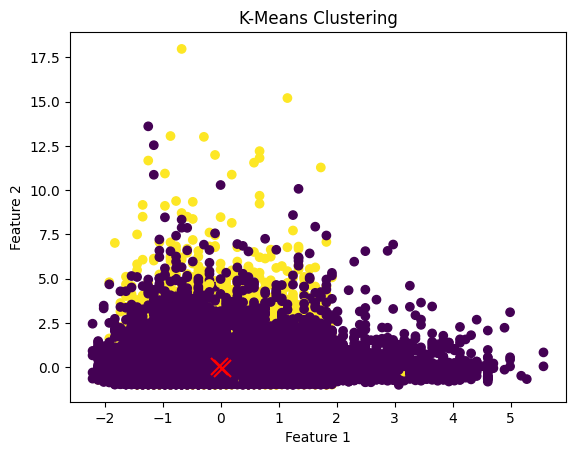

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# # Perform k-means clustering
k_means = KMeans(n_clusters=2, random_state=42) # Random state for reproducibility
clusters = k_means.fit_predict(df_bank_scaled)


plt.scatter(df_bank_scaled[:, 0], df_bank_scaled[:, 1], c=clusters)
# The red cross is the  coordinates of the cluster centroids
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=150, c='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


 ## 4. Evaluate the model
 The inertia (sum of squared distances of samples to their closest cluster center) of the k-means model can be used as a measure of the model

In [6]:
# Evaluate the clustering
print(f'Inertia (Sum of Squared Distances): {k_means.inertia_:.2f}')


Inertia (Sum of Squared Distances): 2469792.36


How to find optimal number of clusters (K)?
Elbow Curve method - We run the model across a range of clusters, calculate average distances to the centroid across all data points and use the number where there is the greatest drop.

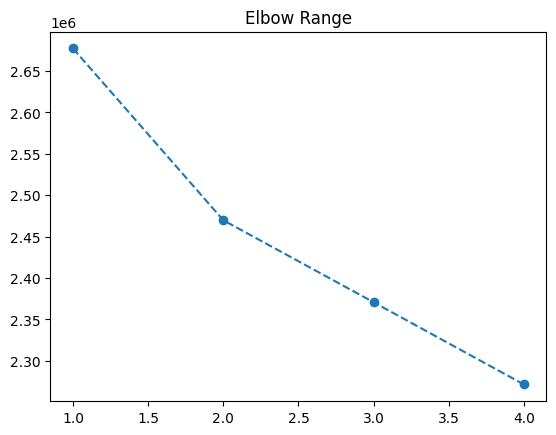

In [7]:
ssd = []

for k in range(1,5):
    model = KMeans(n_clusters=k)
    model.fit(df_bank_scaled)
    
    ssd.append(model.inertia_) ## SSD Point to cluster centers

plt.plot(range(1,5),ssd,"o--")
plt.title("Elbow Range")
plt.show()

## Dimensionality Reduction: reduce dimensionality in data

Transforms high-dimensional data into a lower-dimensional space by projecting or embedding the original features into a new set of fewer features.

Why?
- Dimension reduction reduces noise
- Dimension reduction makes more efficient storage

Principal Component Analysis (PCA) finds the directions (principal components) along which the data has the most variance

- principal components have to align with the axes of the point cloud

How PCA Works
Standardize Data: Center the data to have a mean of 0, and scale each feature to have a variance of 1. This ensures no feature dominates due to its scale.
Compute Covariance Matrix: Calculate the covariance matrix which shows how features vary together.
Compute Eigenvectors and Eigenvalues: Find the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the principal components, while eigenvalues indicate their variance.
Order by Explained Variance Ratio: Sort the principal components by decreasing order of their eigenvalues. Higher eigenvalues correspond to more variance explained.
Select Top k Components: Choose the top k principal components that explain a specified percentage (e.g., 95%) of the total variance.
Project Data to New Subspace: Transform the original dataset to the k-dimensional subspace by projecting the data points onto the top k principal components.


Intrinsic dimension is the number of PCA features with significant variance.

The first principal component of the data is the direction in which the data varies the most.

